## Indicadores Socieconomicos de chicago

Se trabajara con una base de datos obtenida a partir de un archivo .csv que contiene algunos indicadores socioeconomicos de Chicago. Para mas informacion de esta base de datos, puede consultar  [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), 

Las variables de dicho dataset son las siguientes:

-   **Número de área comunitaria** (`ca`): Usado para identificar de manera unica cada fila

-   **Nombre del área comunitaria** (`community_area_name`): El nombre de la region en la ciudad de Chicago 

-   **Porcentaje de viviendas abarrotadas** (`percent_of_housing_crowded`): Porcentaje de unidades de vivienda ocupadas con mas de una persona por habitacion

-   **Porcentaje de hogares por debajo de la pobreza** (`percent_households_below_poverty`): Porcentejae de hogares que viven por debajo de la linea de pobreza federal

-   **Porcentaje de desempleados mayores de 16 años** (`percent_aged_16_unemployed`): Porcentaje de personas mayores a 16 que estan desempleados

-   **Porcentaje de mayores de 25 años sin diploma de escuela secundaria** (`percent_aged_25_without_high_school_diploma`): Porcentaje de personas mayores a 25 sin educacion secundaria

-   **Porcentaje de menores de edad** 18 o más de 64: porcentaje de la población menor de 18 o mayor de 64 años (`percent_aged_under_18_or_over_64`): (ej. dependents)

-   **Ingreso Per capita** (`per_capita_income_`): El ingreso per cápita del área comunitaria se estima como la suma de los ingresos agregados a nivel de zona dividida por la población total

-   **Indice de dificultad** (`hardship_index`): Puntaje que incorpora cada uno de los seis indicadores socioeconómicos seleccionados


## Problemas

### Problema 1

##### Cuantas filas hay en la tabla?


In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directorio = os.getcwd()
con = sqlite3.connect(directorio + '//bases de datos//chicago.db')
cursorObj = con.cursor()

In [3]:
cursorObj.execute("SELECT * FROM jcxqk9xf")
filas = cursorObj.fetchall()
print ("Hay ",len(filas)," filas en la tabla")

Hay  78  filas en la tabla


### Problema 2

##### ¿Cuántas áreas comunitarias en Chicago tienen un índice de dificultad mayor a 50.0?


In [6]:
cursorObj.execute("SELECT hardship_index FROM jcxqk9xf WHERE hardship_index > 50")
filas = cursorObj.fetchall()
print("La cantidad de áreas comunitarias con un indice de dificultad mayor a 50.0 son", len(filas))

La cantidad de áreas comunitarias con un indice de dificultad mayor a 50.0 son 38


### Problema 3

##### ¿Cuál es el valor máximo del índice de dificultades en este conjunto de datos?

In [7]:
cursorObj.execute("SELECT MAX(hardship_index) FROM jcxqk9xf")
maximo = cursorObj.fetchall()
print ("El valor maximo del indice de dificultades es", maximo)

El valor maximo del indice de dificultades es [(98,)]


### Problema 4

##### ¿Qué área de la comunidad tiene el índice de dificultades más alto?


In [8]:
cursorObj.execute("SELECT community_area_name, MAX(hardship_index) FROM jcxqk9xf")
indice = cursorObj.fetchall()
print ("El área de la comunidad con el indice de dificultad más alto es ",indice)

El área de la comunidad con el indice de dificultad más alto es  [('Riverdale', 98)]


### Problema 5

##### ¿Qué áreas de la comunidad de Chicago tienen ingresos per cápita superiores a $ 60,000?


In [9]:
cursorObj.execute("SELECT community_area_name, per_capita_income_ FROM jcxqk9xf WHERE per_capita_income_ > 60000")
ingresos = cursorObj.fetchall()
print("Las comunidades con ingresos superiores a $60.000 son: ", ingresos)

Las comunidades con ingresos superiores a $60.000 son:  [('Lake View', 60058), ('Lincoln Park', 71551), ('Near North Side', 88669), ('Loop', 65526)]


### Problema 6

##### Cree un diagrama de dispersión usando las variables `per_capita_income_` y ` hardship_index`. Explique la correlación entre las dos variables. 


In [10]:
cursorObj.execute("SELECT per_capita_income_ FROM jcxqk9xf")
x = cursorObj.fetchall()

In [11]:
cursorObj.execute("SELECT hardship_index FROM jcxqk9xf")
y = cursorObj.fetchall()

Text(0.5, 1.0, 'Indice de dificultad vs Ingreso per capita')

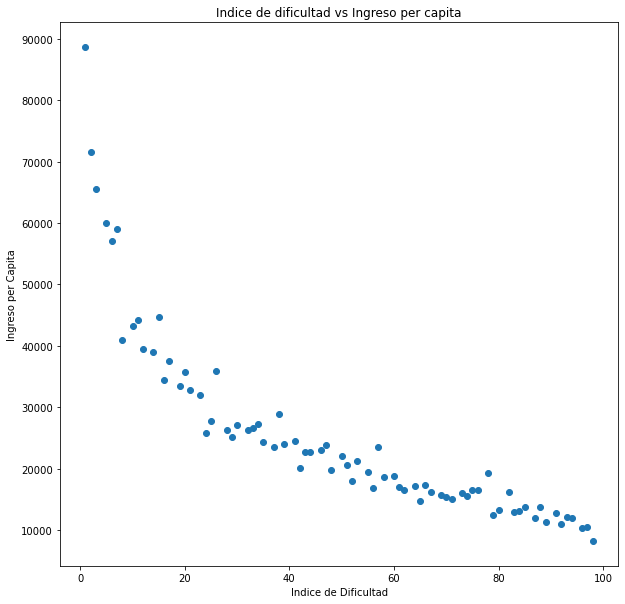

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(y,x)
ax.set_xlabel("Indice de Dificultad")
ax.set_ylabel("Ingreso per Capita")
ax.set_title("Indice de dificultad vs Ingreso per capita")



Conclusión

Las conclusiones con respecto a la grafica son las siguientes:

-   **Correlación**: Es inversamente proporcional

-   Cuando el indice de dificultad aumenta el ingreso per capita disminuye

-   Cuando el indice de dificultad disminuye el ingreso per capita aumenta

